En Eurostar queremos abrir nuestra primera sede en Marte, para ello vamos a contratar a una compañía de viajes espaciales que traslade a nuestro personal a este lugar, pero debido a la rareza del proyecto nos surgen muchas preguntas.

En el correo se adjunta un dataset sobre los viajes espaciales que se han realizado desde la Tierra a Marte en las últimas décadas, viniendo información relevante como el cohete utilizado, el capitán seleccionado o el lugar de lanzamiento, junto al resultado de la misión de exploración lunar.

Conociendo esta información se solicita que se haga un análisis exploratorio de la información para contestar las siguientes preguntas:

* ¿El lugar de lanzamiento influye en el éxito de la operación? ¿La hora de lanzamiento tiene relevancia?
* En caso de tener que realizar una misión de reconocimiento lunar, ¿Que compañía se debería contratar? ¿Por qué?
* ¿En que medida afecta el peso del cohete?
* ¿Cual sería la clasificación de capitanes de mejor a peor en función a los éxitos de sus misiones? ¿Existe mejoría en los capitanes con el paso de las misiones?
* ¿Que compañía, lugar y capitán recomienda que se contraten para nuestro viaje espacial?
De sus respuestas dependerá el éxito de esta misión.

Muchas gracias.

## Inicio del ejercicio 


In [358]:
####################################################
# Cargamos las librerias necesarias
####################################################
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('default')
import seaborn as sb
import os

In [359]:
####################################################
# Cargamos los datos del csv un un archivo Pandas 
# Visualizamos los datos para hacernos una idea de su forma
####################################################
df_original = pd.read_csv(r'Space_Corrected.csv')
df_original.head(10)


,ID,Nombre de la compañía,Localización,Fecha,Nombre del cohete,Status Rocket,Peso del cohete,Status Mission,Capitán
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5,StatusActive,50.0,Success,Alex Moreno
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D,StatusActive,29.75,Success,Juan Miranda
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype,StatusActive,NaN,Success,Sergio Canales
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M,StatusActive,65.0,Success,Cristian Tello
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541,StatusActive,145.0,Success,Victor Camarasa
5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC",Long March 4B,StatusActive,64.68,Success,Victor Camarasa
6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a,StatusActive,48.5,Success,Sergio Canales
7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5,StatusActive,NaN,Success,Borja Iglesias
8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5,StatusActive,50.0,Success,Victor Camarasa
9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202,StatusActive,90.0,Success,Cristian Tello


In [360]:
####################################################
# revisamos la informacion dle dataframe
####################################################
df_original.info()
print('----------------')
df_original.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     4324 non-null   int64 
 1   Nombre de la compañía  4324 non-null   object
 2   Localización           4324 non-null   object
 3   Fecha                  4324 non-null   object
 4   Nombre del cohete      4324 non-null   object
 5   Status Rocket          4324 non-null   object
 6   Peso del cohete        964 non-null    object
 7   Status Mission         4324 non-null   object
 8   Capitán                4324 non-null   object
dtypes: int64(1), object(8)
memory usage: 304.2+ KB
----------------


(4324, 9)

In [361]:
####################################################
# Podemos ver que en el peso del cohete tenemos datos que no conocemos
# Pero en el resto de variables, no hay ningun NAN.
####################################################
print(df_original.isna().sum())
print('--------')
print(df_original.isnull().sum())
print('--------')
# En este caso, los null y los na son los mismos.
####################################################
# También comprobamos que no hay ningún vacio en los datos
####################################################
print('' in df_original[df_original.columns].values)


ID                          0
Nombre de la compañía       0
Localización                0
Fecha                       0
Nombre del cohete           0
Status Rocket               0
Peso del cohete          3360
Status Mission              0
Capitán                     0
dtype: int64
--------
ID                          0
Nombre de la compañía       0
Localización                0
Fecha                       0
Nombre del cohete           0
Status Rocket               0
Peso del cohete          3360
Status Mission              0
Capitán                     0
dtype: int64
--------
False


In [362]:
####################################################
# Haremos ahora un analisis descriptibo de los datos
####################################################
df_original.describe()

,ID
count,4324.000000
mean,2161.500000
std,1248.375611
min,0.000000
25%,1080.750000
50%,2161.500000
75%,3242.250000
max,4323.000000


In [363]:
#####################################################
# Hacemos una copia del df original para trabajar con el
####################################################
df = df_original.copy()

Responderemos ahora a las perguntas:
* ¿El lugar de lanzamiento influye en el éxito de la operación? ¿La hora de lanzamiento tiene relevancia?


In [364]:
df_lugar = df.groupby(['Localización']).size().reset_index(name='lanzamientos')
df_lugar

,Localización,lanzamientos
0,"Blue Origin Launch Site, West Texas, Texas, USA",12
1,"Brigitte, Hammaguir, Algeria, France",4
2,"Cosmic Girl, Mojave Air and Space Port, Califo...",1
3,"Douglas F4D Skyray, Naval Air Station Point Mu...",6
4,"ELA-1, Guiana Space Centre, French Guiana, France",15
...,...,...
132,"Taiyuan Satellite Launch Center, China",7
133,"Uchinoura Space Center, Japan",7
134,"VLS Pad, Alc?›ntara Launch Center, Maranh?œo, ...",3
135,"Vertical Launch Area, Spaceport America, New M...",4


Text(0.5, 1.0, '10 localizaciones con mas lanzamientos')

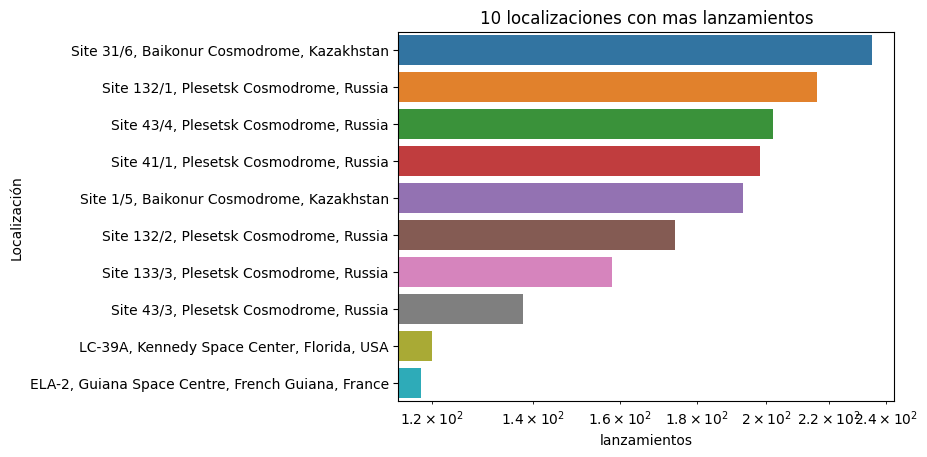

In [365]:
sb.barplot(data=df_lugar.sort_values(by=['lanzamientos'], ascending=False).head(10), x="lanzamientos", y="Localización")
plt.xscale('log') # Escalamos de forma logaritmica para que los datoas sean mas visuales
plt.title('10 localizaciones con mas lanzamientos')

In [366]:
#####################################################
# Calcularemos ahora la probabilidad de existo por lanzamiento segun la localizacion
####################################################

lista_localizacion = list(df['Localización'].unique())

num_lanzamientos = []
num_success = []
prob_success = []

#####################################################
# Calculamos el numero de lanzamientos por localizacion
####################################################
for localizacion in lista_localizacion:
    num_lanzamientos.append(((df[df['Localización']== localizacion]).shape)[0]) # Con shape cojo filas y columnas
    num_success.append((df[(df['Localización']==localizacion) & (df['Status Mission'] == 'Success')]).shape[0])
    
#####################################################
# Probabilidad de exito por compañia
#####################################################   
for i in range(len(num_lanzamientos)):
    prob_success.append(num_success[i]/num_lanzamientos[i])

    
#####################################################
# Convierto estas listas en un diccionario para poder crear un dataframe
##################################################### 
data_dict = {'localización': lista_localizacion, 'lanzamientos': num_lanzamientos, 'success': num_success, 'probabilidad': prob_success}
df_succes_lanzamiento = pd.DataFrame(data=data_dict, columns= ['localización', 'lanzamientos', 'success','probabilidad'])

 
df_ordenado = df_succes_lanzamiento.sort_values(by=['lanzamientos', 'probabilidad'], ascending=[False, False])
df_ordenado.head(5)



,localización,lanzamientos,success,probabilidad
6,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",235,220,0.936170
66,"Site 132/1, Plesetsk Cosmodrome, Russia",216,203,0.939815
18,"Site 43/4, Plesetsk Cosmodrome, Russia",202,190,0.940594
85,"Site 41/1, Plesetsk Cosmodrome, Russia",198,186,0.939394
36,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",193,155,0.803109


In [367]:
df_succes_lanzamiento.sort_values(by=['probabilidad', 'lanzamientos'], ascending=[False, False]).head(5)

,localización,lanzamientos,success,probabilidad
73,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",69,69,1.0
67,"LC-39B, Kennedy Space Center, Florida, USA",56,56,1.0
44,"SLC-2W, Vandenberg AFB, California, USA",49,49,1.0
1,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",37,37,1.0
72,"LC-7, Taiyuan Satellite Launch Center, China",22,22,1.0


A la hora de elegir una localización, habremos de tener en cuenta dos factores, su probabilidad de exito y el número de lanzamientos que ha realizado. Hay localizaciones que tienen solo 37 lanzamientos y una probabilidad de exito del 100%. Sin embargo, quizá es preferible coger una localización con muchos más lanzamientos y una probabilidad menor, pues por la ley de los grandes números sabemos que nuestros resultados son más exáctos a medida que tenemos una mayor cantidad de datos. En este caso, aparentemente el lugar de lanzamiento sí influye, aunque la varianza de la probabilidad es bastante baja.

In [368]:
print(statistics.variance(df_succes_lanzamiento['probabilidad']))
print(statistics.mean(df_succes_lanzamiento['probabilidad']))

0.0785091713940242
0.787206240240799


In [369]:
#####################################################
# Operando de la misma forma para la hora
####################################################
# Cremos una variable hora a partir de la fecha
df['hora'] = df['Fecha'].str.split(', ').str[1].str.split(' ').str[1]
# Como algunos de los datos de fecha no tienen hora, hacemos un drop de los nan
df_horas = df[df['hora'].notna()]

lista_hora = list(df_horas['hora'].unique())

num_lanzamientos = []
num_success = []
prob_success = []

#####################################################
# Calculamos el numero de lanzamientos por localizacion
####################################################
for hora in lista_hora:
    num_lanzamientos.append(((df_horas[df_horas['hora']== hora]).shape)[0]) # Con shape cojo filas y columnas
    num_success.append((df_horas[(df_horas['hora']==hora) & (df['Status Mission'] == 'Success')]).shape[0])
    
#####################################################
# Probabilidad de exito por compañia
#####################################################   
for i in range(len(num_lanzamientos)):
    prob_success.append(num_success[i]/num_lanzamientos[i])

    
#####################################################
# Convierto estas listas en un diccionario para poder crear un dataframe
##################################################### 
data_dict = {'hora': lista_hora, 'lanzamientos': num_lanzamientos, 'success': num_success, 'probabilidad': prob_success}
df_succes_lanzamiento = pd.DataFrame(data=data_dict, columns= ['hora', 'lanzamientos', 'success','probabilidad'])

 
df_ordenado = df_succes_lanzamiento.sort_values(by=['lanzamientos', 'probabilidad'], ascending=[False, False])
df_ordenado.head(10)



C:\Users\U029987\Python\python-3.6.8-embed-amd64\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,hora,lanzamientos,success,probabilidad
354,12:00,51,45,0.882353
327,11:00,45,36,0.800000
31,10:00,32,31,0.968750
467,13:00,31,29,0.935484
187,08:00,30,26,0.866667
943,09:00,30,25,0.833333
101,14:00,24,20,0.833333
569,08:30,23,23,1.000000
966,15:00,23,21,0.913043
1047,09:30,23,21,0.913043


In [370]:
print(statistics.variance(df_succes_lanzamiento['probabilidad']))
print(statistics.mean(df_succes_lanzamiento['probabilidad']))
print('---')
df_succes_lanzamiento[df_succes_lanzamiento['lanzamientos']>3]

0.04645286376044344
0.9029288336680262
---


,hora,lanzamientos,success,probabilidad
0,05:12,4,3,0.750000
2,23:57,4,4,1.000000
4,11:50,7,7,1.000000
7,04:41,5,5,1.000000
8,21:30,9,7,0.777778
...,...,...,...,...
1160,13:29,4,4,1.000000
1161,12:59,5,5,1.000000
1171,11:29,6,6,1.000000
1172,07:39,4,4,1.000000


En este caso parece que las primeras horas de la mañana tienen mayor éxito, pero debido a la escasez de los datos no podemos confirmar nada, ya que si nos fijamos solo 404 horas tienen más de 3 registros de lanzamiento

* En caso de tener que realizar una misión de reconocimiento lunar, ¿Que compañía se debería contratar? ¿Por qué?

Para ver el éxito de una compaía, podemos utilizar también las probabilidades. 

In [371]:
#####################################################
# Operando de la misma forma que para la hora
####################################################
lista_comp = list(df['Nombre de la compañía'].unique())

num_lanzamientos = []
num_success = []
prob_success = []

#####################################################
# Calculamos el numero de lanzamientos por localizacion
####################################################
for comp in lista_comp:
    num_lanzamientos.append(((df[df['Nombre de la compañía']== comp]).shape)[0]) # Con shape cojo filas y columnas
    num_success.append((df[(df['Nombre de la compañía']==comp) & (df['Status Mission'] == 'Success')]).shape[0])
    
#####################################################
# Probabilidad de exito por compañia
#####################################################   
for i in range(len(num_lanzamientos)):
    prob_success.append(num_success[i]/num_lanzamientos[i])

    
#####################################################
# Convierto estas listas en un diccionario para poder crear un dataframe
##################################################### 
data_dict = {'Compania': lista_comp, 'lanzamientos': num_lanzamientos, 'success': num_success, 'probabilidad': prob_success}

df_succes_lanzamiento = pd.DataFrame(data=data_dict, columns= ['Compania', 'lanzamientos', 'success','probabilidad'])

 
df_ordenado = df_succes_lanzamiento.sort_values(by=['lanzamientos', 'probabilidad'], ascending=[False, False])
df_mejores = df_ordenado.head(10).reset_index()
df_mejores



,index,Compania,lanzamientos,success,probabilidad
0,40,RVSN USSR,1777,1614,0.908272
1,13,Arianespace,279,269,0.964158
2,1,CASC,251,231,0.920319
3,42,General Dynamics,251,203,0.808765
4,32,NASA,203,186,0.916256
5,10,VKS RF,201,188,0.935323
6,47,US Air Force,161,129,0.801242
7,3,ULA,140,139,0.992857
8,33,Boeing,136,131,0.963235
9,43,Martin Marietta,114,100,0.877193


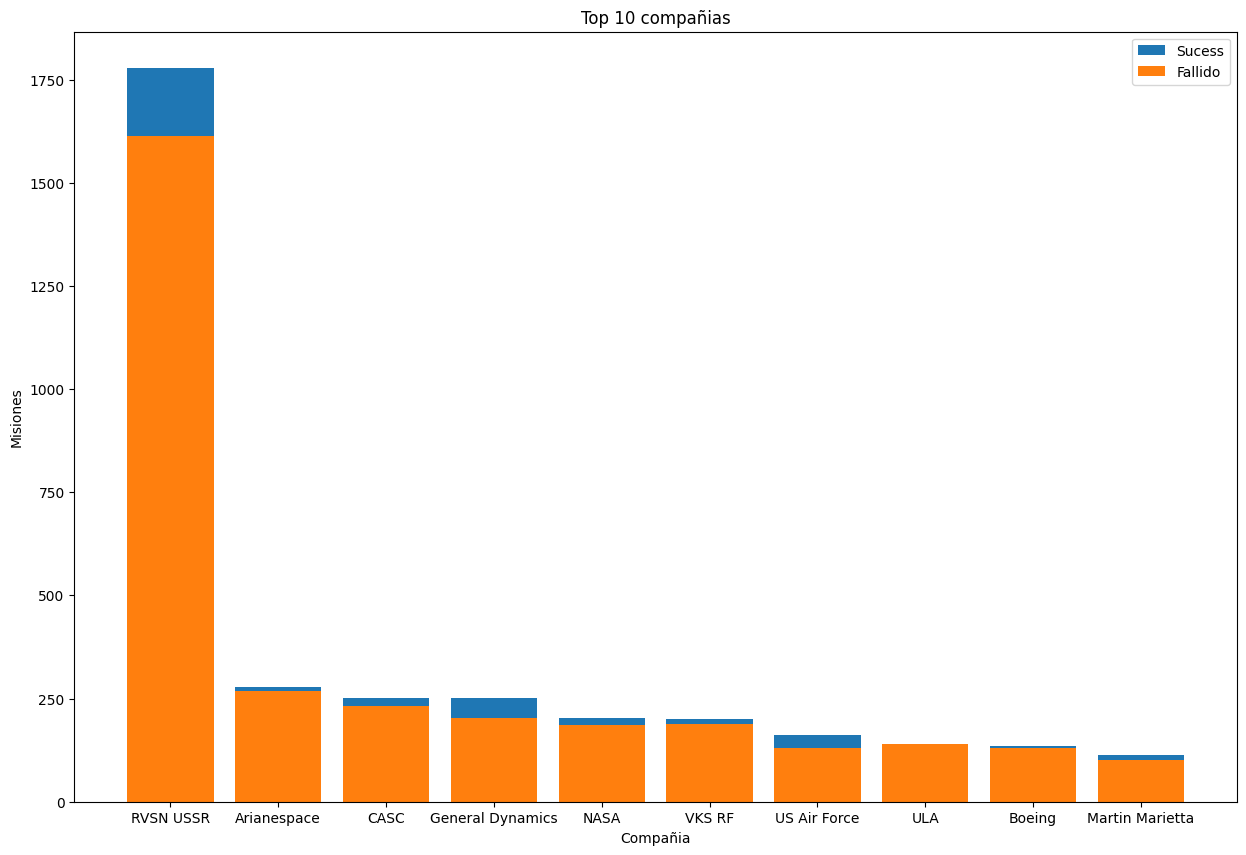

In [372]:
#####################################################
# Plot con el numero de exitos y fallos por coamñaia
##################################################### 
plt.figure(figsize=(15,10))
plt.bar(df_mejores['Compania'], df_mejores['lanzamientos'])
plt.bar(df_mejores['Compania'],  df_mejores['success'])
plt.xlabel('Compañia')
plt.ylabel('Misiones')
plt.title('Top 10 compañias')
plt.legend(['Sucess','Fallido'])
plt.show()

A la vista de los resultados, RVSN USSR y Arianespace serían las mejores opciones, dado al expertise que tiene RVSN USSR y al gran éxito que tiene Arianespace.
Notables también los resultados de ULA, con casi un 100% de sucess con 140 lanzamientos

* ¿En que medida afecta el peso del cohete?

In [373]:
#####################################################
# Operando de la misma forma que para la hora
####################################################
df_peso = df_original.dropna()
lista_comp = list(df_peso['Peso del cohete'].unique())

num_lanzamientos = []
num_success = []
prob_success = []
for comp in lista_comp:
    num_lanzamientos.append(((df_peso[df_peso['Peso del cohete']== comp]).shape)[0]) # Con shape cojo filas y columnas
    num_success.append((df_peso[(df_peso['Peso del cohete']==comp) & (df_peso['Status Mission'] == 'Success')]).shape[0])
  
for i in range(len(num_lanzamientos)):
    prob_success.append(num_success[i]/num_lanzamientos[i])
data_dict = {'Peso': lista_comp, 'lanzamientos': num_lanzamientos, 'success': num_success, 'probabilidad': prob_success}

df_succes_lanzamiento = pd.DataFrame(data=data_dict, columns= ['Peso', 'lanzamientos', 'success','probabilidad'])

 
df_ordenado = df_succes_lanzamiento.sort_values(by=['lanzamientos', 'probabilidad'], ascending=[False, False])
df_mejores = df_ordenado.head(10).reset_index()
df_mejores

,index,Peso,lanzamientos,success,probabilidad
0,44,450.0,136,134,0.985294
1,17,200.0,75,73,0.973333
2,23,40.0,55,50,0.909091
3,25,62.0,41,40,0.975610
4,11,30.8,38,38,1.000000
5,32,109.0,37,36,0.972973
6,0,50.0,34,34,1.000000
7,4,64.68,34,32,0.941176
8,1,29.75,33,32,0.969697
9,6,90.0,32,32,1.000000


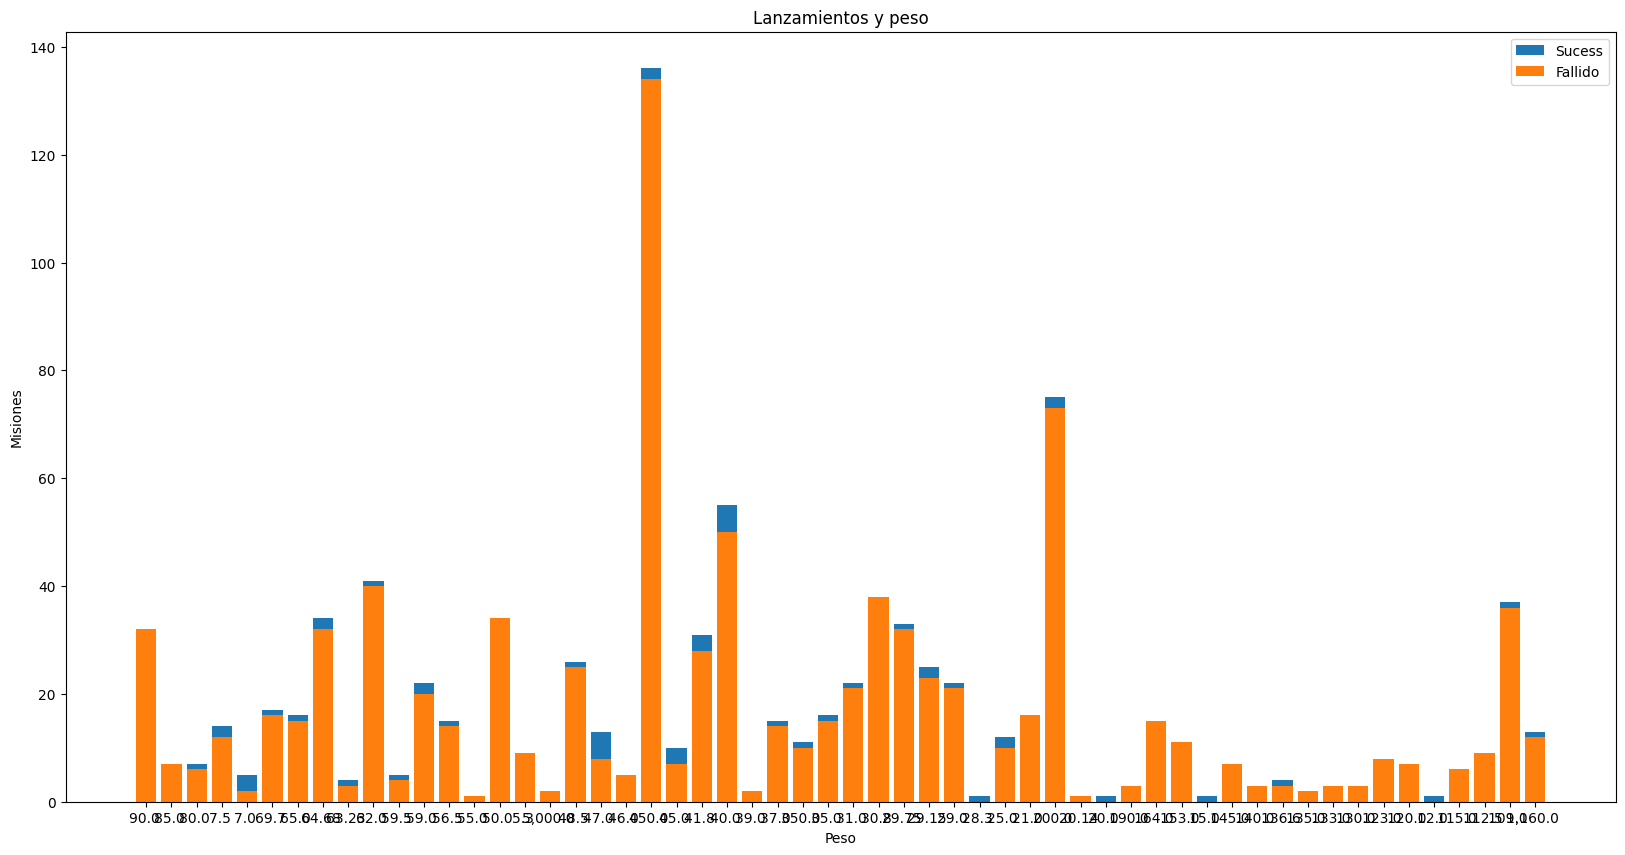

In [374]:
df_ordenado_peso = df_ordenado.sort_values(by=['Peso'], ascending=[False])
plt.figure(figsize=(20,10))
plt.bar(df_ordenado_peso['Peso'], df_ordenado_peso['lanzamientos'])
plt.bar(df_ordenado_peso['Peso'],  df_ordenado_peso['success'])
plt.xlabel('Peso')
plt.ylabel('Misiones')
plt.title('Lanzamientos y peso')
plt.legend(['Sucess','Fallido'])
plt.show()

In [375]:
df_original[df_original['Peso del cohete']=='450.0 ']

,ID,Nombre de la compañía,Localización,Fecha,Nombre del cohete,Status Rocket,Peso del cohete,Status Mission,Capitán
682,682,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Jul 08, 2011 15:29 UTC",Space Shuttle Atlantis,StatusRetired,450.0,Success,Alex Moreno
687,687,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon May 16, 2011 12:56 UTC",Space Shuttle Endeavour,StatusRetired,450.0,Success,Alex Moreno
695,695,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Feb 24, 2011 21:53 UTC",Space Shuttle Discovery,StatusRetired,450.0,Success,Victor Ruiz
726,726,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri May 14, 2010 18:20 UTC",Space Shuttle Atlantis,StatusRetired,450.0,Success,Juan Miranda
733,733,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Apr 05, 2010 10:21 UTC",Space Shuttle Discovery,StatusRetired,450.0,Success,Victor Camarasa
...,...,...,...,...,...,...,...,...,...
2300,2300,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Nov 11, 1982 12:19 UTC",Space Shuttle Columbia,StatusRetired,450.0,Success,Borja Iglesias
2323,2323,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Jun 27, 1982 16:09 UTC",Space Shuttle Columbia,StatusRetired,450.0,Success,Alex Moreno
2348,2348,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Mar 22, 1982 16:00 UTC",Space Shuttle Columbia,StatusRetired,450.0,Success,Alex Moreno
2371,2371,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Nov 12, 1981 15:09 UTC",Space Shuttle Columbia,StatusRetired,450.0,Success,Cristian Tello


A primera vista no podemos decir nada del peso, ya que los éxitos no parecen seguir ninguna distribución. Sí que es cierto que el cohete más pesado es también el más exitoso, aunque esto no tiene por qué deberse al peso, sino al modelo del cohete, hora, lugar de lanzamiento...
* ¿Cual sería la clasificación de capitanes de mejor a peor en función a los éxitos de sus misiones? ¿Existe mejoría en los capitanes con el paso de las misiones?
Para los capitanes se volvería a realizar el mismo proceso, estudiando así sus éxitos. 

In [376]:
#####################################################
# Operando de la misma forma que para la hora
####################################################
lista_comp = list(df['Capitán'].unique())

num_lanzamientos = []
num_success = []
prob_success = []

#####################################################
# Calculamos el numero de lanzamientos por localizacion
####################################################
for comp in lista_comp:
    num_lanzamientos.append(((df[df['Capitán']== comp]).shape)[0]) # Con shape cojo filas y columnas
    num_success.append((df[(df['Capitán']==comp) & (df['Status Mission'] == 'Success')]).shape[0])
    
#####################################################
# Probabilidad de exito por compañia
#####################################################   
for i in range(len(num_lanzamientos)):
    prob_success.append(num_success[i]/num_lanzamientos[i])

    
#####################################################
# Convierto estas listas en un diccionario para poder crear un dataframe
##################################################### 
data_dict = {'Compania': lista_comp, 'lanzamientos': num_lanzamientos, 'success': num_success, 'probabilidad': prob_success}

df_succes_lanzamiento = pd.DataFrame(data=data_dict, columns= ['Compania', 'lanzamientos', 'success','probabilidad'])

 
df_ordenado = df_succes_lanzamiento.sort_values(by=['lanzamientos', 'probabilidad'], ascending=[False, False])
df_mejores = df_ordenado.head(10).reset_index()
df_mejores


,index,Compania,lanzamientos,success,probabilidad
0,3,Cristian Tello,568,515,0.906690
1,6,Victor Ruiz,565,517,0.915044
2,2,Sergio Canales,555,498,0.897297
3,5,Borja Iglesias,547,491,0.897623
4,0,Alex Moreno,541,479,0.885397
5,7,Joaquín Sánchez,536,490,0.914179
6,4,Victor Camarasa,512,452,0.882812
7,1,Juan Miranda,500,437,0.874000


Podemos observar como los dos capitanes con mayor éxito son Cristian Tello y Joaquin Sánchez. 

PAra estudiar la progesión, veremos la probabilidad de suceso por año en cada capitán. 
<!--  -->

In [377]:
# Crearemos un df por cada captán para ver la probabilidad de suceso, realmente esta no es la forma más adecuada pero debido al escaso tiempo que tengo para realizar la prueba, servirá
lista_capitan = list(df['Capitán'].unique())
lista_con_info = []
for capitan in lista_capitan:
    #Creo el df por capitan
    df_capitan = df_original[df_original['Capitán']==capitan]
    # Tomo las fechas en las que participa
    df_capitan['anualidad'] = df_capitan['Fecha'].str.split(', ').str[1].str.split(' ').str[0]
    
    lista_comp = list(df['anualidad'].unique())
    num_lanzamientos = []
    num_success = []
    prob_success = []

    #####################################################
    # Calculamos el numero de lanzamientos por localizacion
    ####################################################
    for comp in lista_comp:
        num_lanzamientos.append(((df_capitan[df_capitan['anualidad']== comp]).shape)[0]) # Con shape cojo filas y columnas
        num_success.append((df_capitan[(df_capitan['anualidad']==comp) & (df_capitan['Status Mission'] == 'Success')]).shape[0])
        
    #####################################################
    # Probabilidad de exito por compañia
    #####################################################   
    for i in range(len(num_lanzamientos)):
        #Evito la division por 0
        try:
            prob_success.append(num_success[i]/num_lanzamientos[i])
        except:
            prob_success.append(0)


        
    #####################################################
    # Convierto estas listas en un diccionario para poder crear un dataframe
    ##################################################### 
    data_dict = {'Anualidad': lista_comp, 'lanzamientos': num_lanzamientos, 'success': num_success, 'probabilidad': prob_success}

    df_succes_lanzamiento = pd.DataFrame(data=data_dict, columns= ['Anualidad', 'lanzamientos', 'success','probabilidad'])

    df_ordenado = df_succes_lanzamiento.sort_values(by=['lanzamientos', 'probabilidad'], ascending=[False, False])
    lista_con_info.append(df_ordenado)
    


C:\Users\U029987\Python\python-3.6.8-embed-amd64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


KeyError: 'anualidad'

Juan Miranda


Text(0, 0.5, 'Probabilidad de exito')

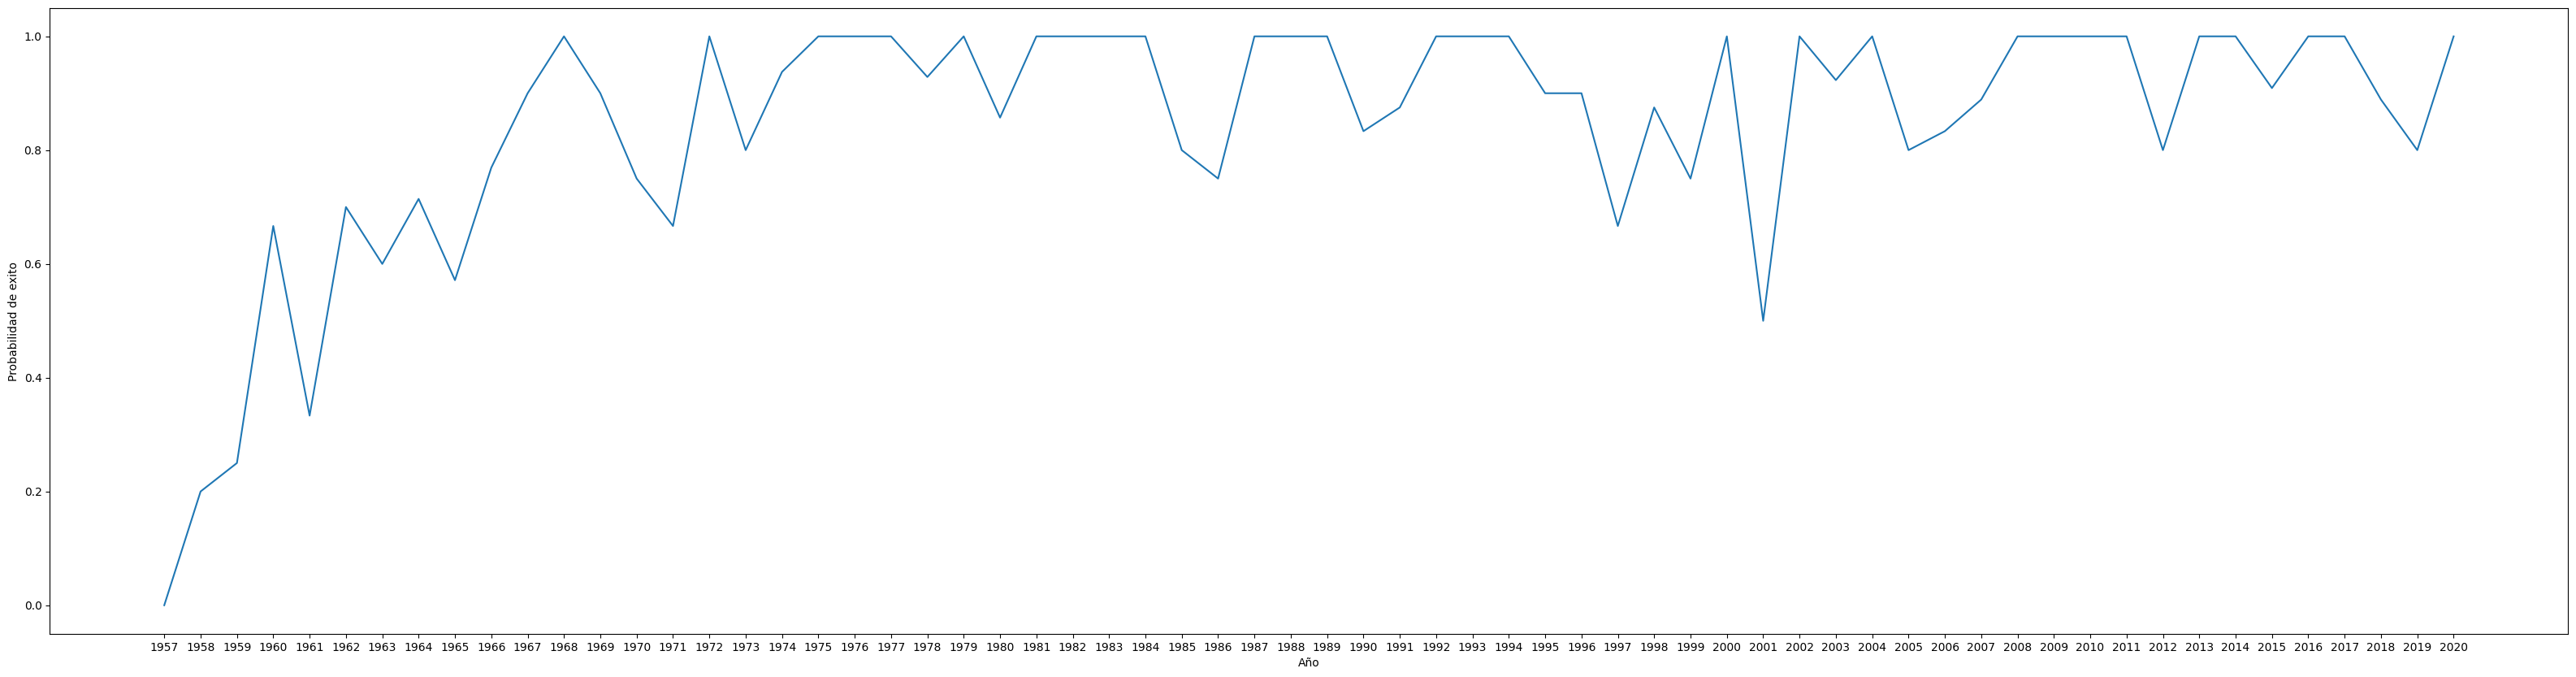

In [ ]:
# Veamos por ejemplo al capitán Juan Miranda
print(lista_capitan[1])
plt.figure(figsize=(40,10))
df_juan = lista_con_info[1].sort_values(by='Anualidad')
plt.plot(df_juan.Anualidad,df_juan.probabilidad)
plt.xlabel('Año')
plt.ylabel('Probabilidad de exito')

Borja Iglesias


Text(0, 0.5, 'Probabilidad de exito')

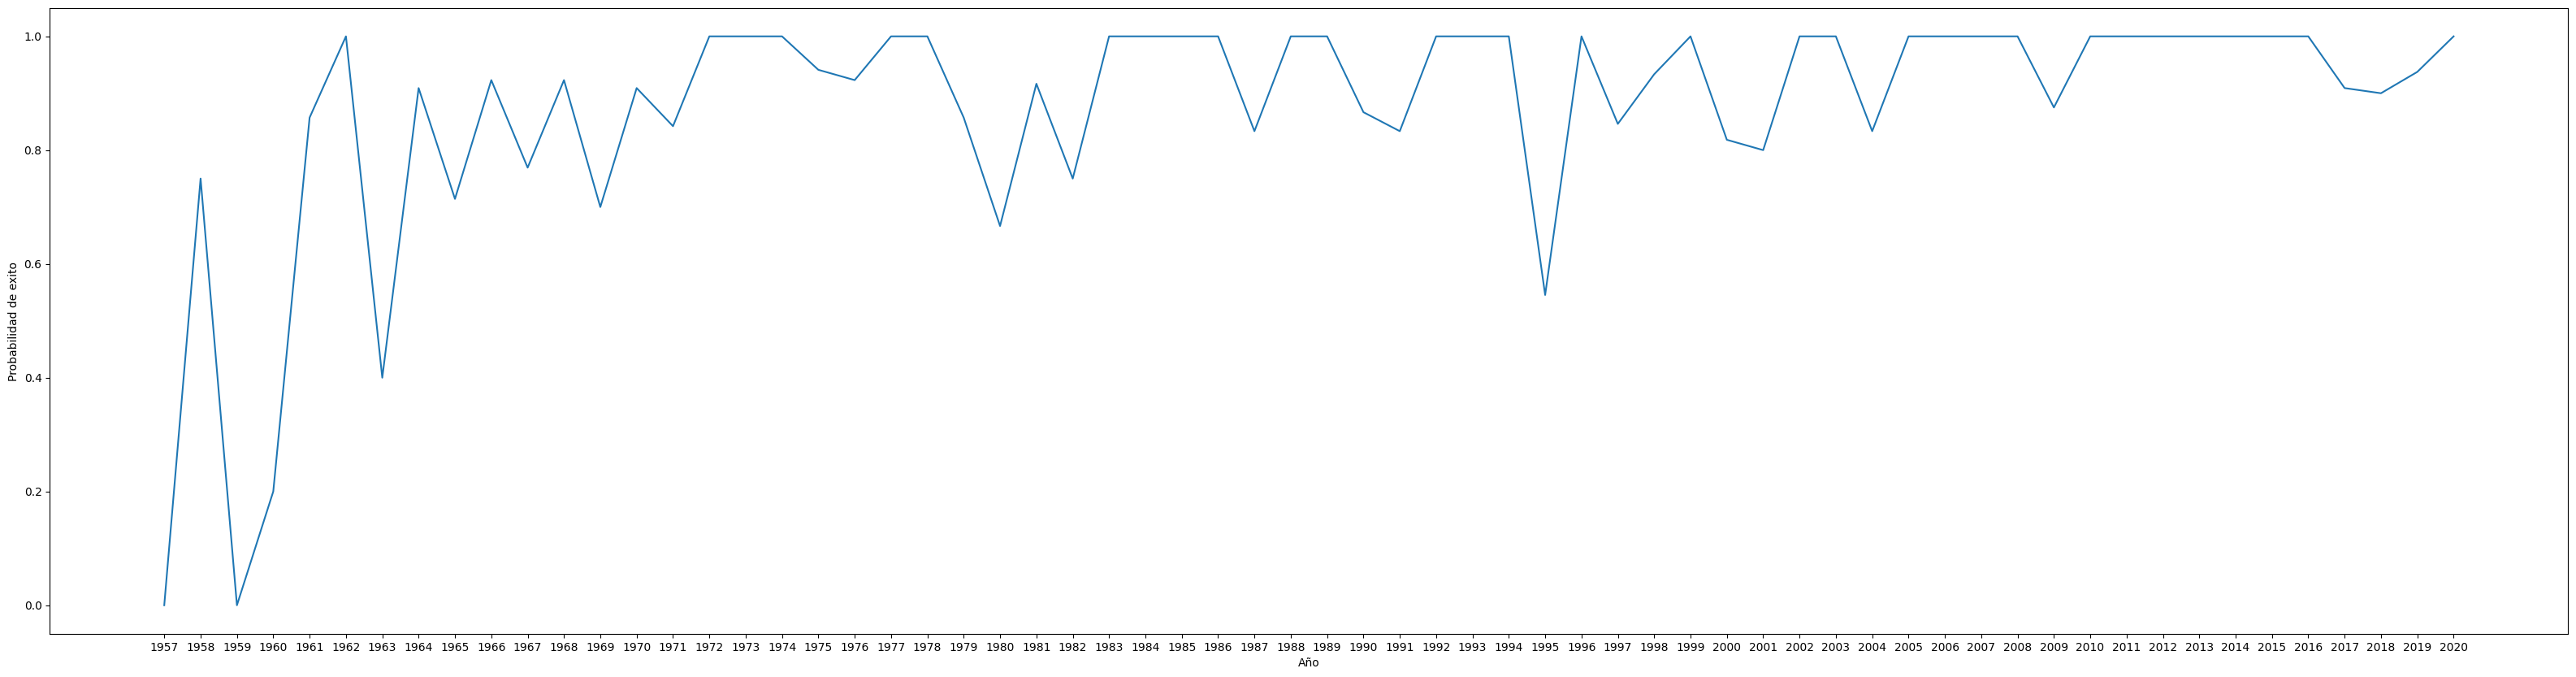

In [ ]:
# Veamos ahora a Borja Iglesias
print(lista_capitan[5])
plt.figure(figsize=(40,10))
df_borja = lista_con_info[5].sort_values(by='Anualidad')
plt.plot(df_borja.Anualidad,df_borja.probabilidad)
plt.xlabel('Año')
plt.ylabel('Probabilidad de exito')

Así pues, podemos ver como por norma general, los capitanes han mejorado sus resultados.

* ¿Que compañía, lugar y capitán recomienda que se contraten para nuestro viaje espacial?
  
A priori, podríamos elegir como mejor resultado a: La mejor compañia, el mejor lugar y el mejor capitán, basandonos en sus resultados idividuales, pero puede que estos estén correlados.
Quizá el mejor capitán (pongamos que es Borja) tiene muy buenos resultados en USA, pero unos resultados malísimos en Rusia  (el mejor lugar de lanzamiento). Para evitar esto, podríamos iterar por todas las opciones posibles, calculando así el resultado óptimo, aunque computacionalmente eso será muy costoso, pues habrá que iterar por cientos de combinacione (anidando tres bucles for)
Así pues, mi recomendación sería elegir mediante criterio experto este resultado, tomando primero un lugar (pues será lo más costoso de decidir), una compañía (pues no todas podrán trabajar en el mismo lugar) y un capitán (pues cada compaía tendrá distintos capitanes disponibles. )